In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import scipy.cluster.hierarchy as sch
from kneed import KneeLocator
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import dendrogram as dend

# 4

## 1

In [2]:
#Load the dataset and report basic information
file_path = 'Wholesale customers data.csv'
data = pd.read_csv(file_path)

print("Dataset columns:", data.columns)
print(80*"-")
print("Dataset info:")
print(data.info())
print(80*"-")
print("Dataset description:")
print(data.describe())
print(80*"-")
print(data.isnull().sum())
print(80*"-")
data.head()

Dataset columns: Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')
--------------------------------------------------------------------------------
Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB
None
--------------------------------------------------------------------------------
Dataset description:
          Channel      Region          Fresh          Milk

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


## 2

In [3]:
#Perform PCA to reduce feature size to two
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
pca_df.head()

,PC1,PC2
0,0.843939,-0.515351
1,1.062676,-0.484601
2,1.269141,0.682055
3,-1.056782,0.610821
4,0.634030,0.974199


## 3

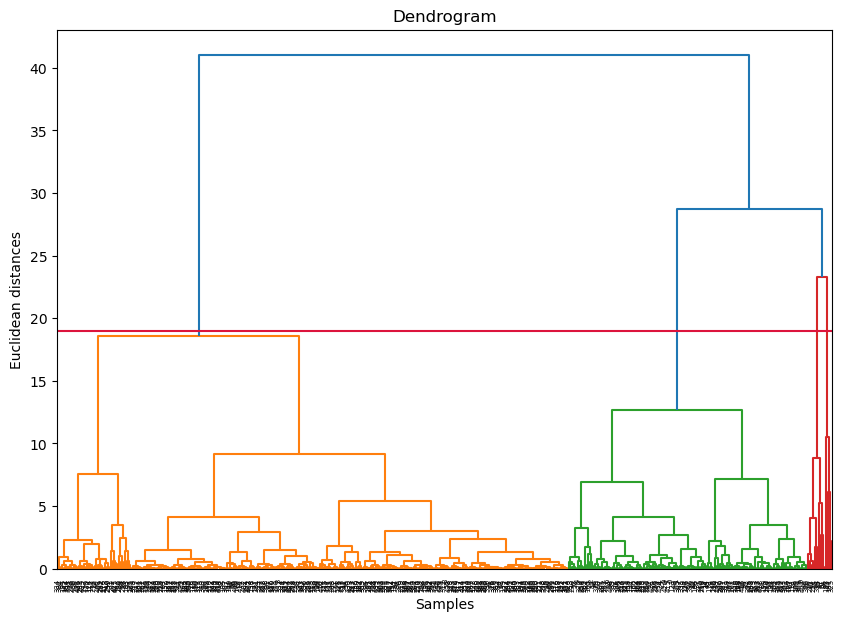

In [4]:
#Ward method to plot Dendrogram
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(pca_df, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')

plt.axhline(19, color='crimson')
plt.show()

**با رد کردن خط افقی از بلند ترین خط عمودی در این حالت میتوان حداکثر 4 قطع دید. پس بهینه تعداد کلاستر چهار است**

## 4

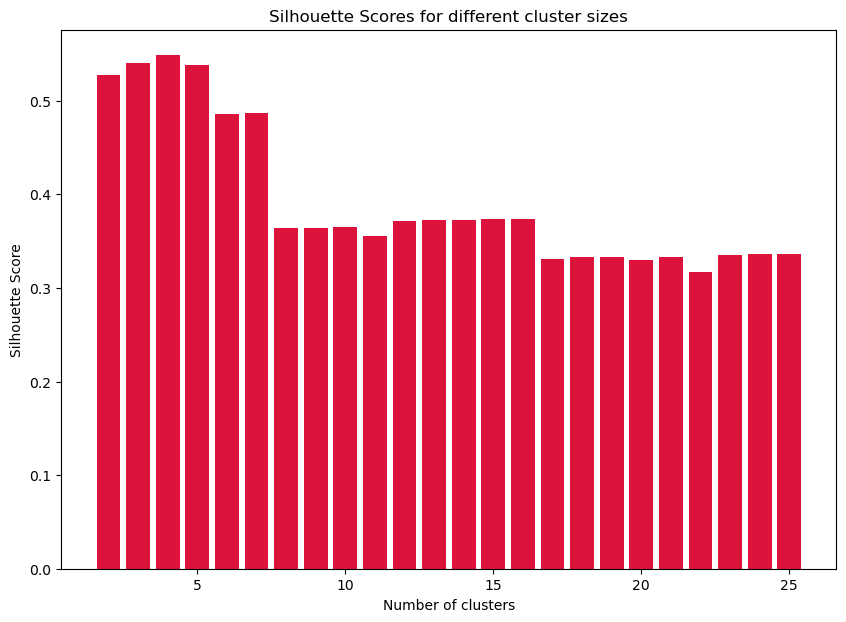

Best number of clusters: 4


In [5]:
#Agglomerative clustering and silhouette analysis
silhouette_scores = []
for n_clusters in range(2, 26):
    agglom = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    cluster_labels = agglom.fit_predict(pca_df)
    silhouette_avg = silhouette_score(pca_df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 7))
plt.bar(range(2, 26), silhouette_scores, color='crimson')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for different cluster sizes')
plt.show()

best_k = np.argmax(silhouette_scores) + 2
print(f"Best number of clusters: {best_k}")


## 5

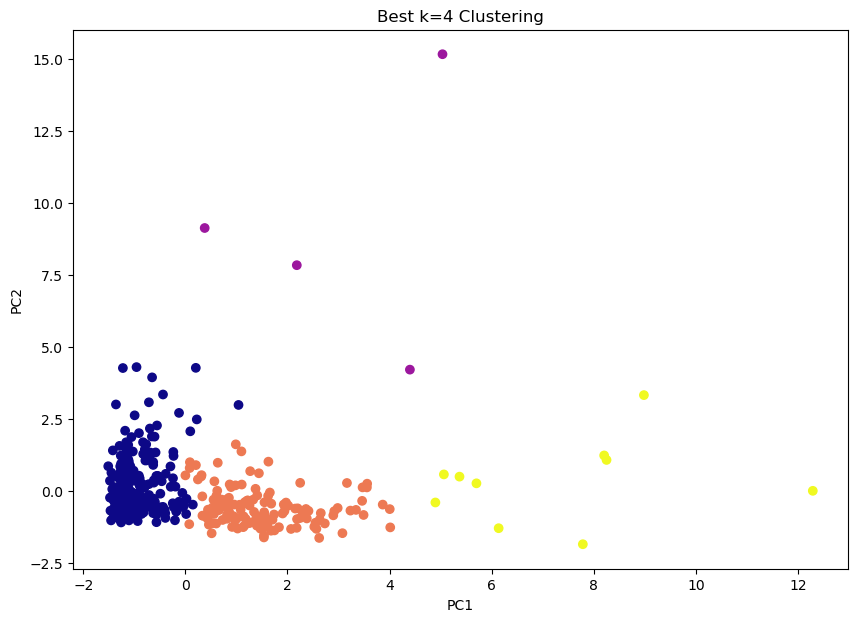

In [6]:
#Scatter plot for best k
best_agglom = AgglomerativeClustering(n_clusters=best_k)
best_clusters = best_agglom.fit_predict(pca_df)
plt.figure(figsize=(10, 7))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=best_clusters, cmap='plasma')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title(f'Best k={best_k} Clustering')
plt.show()

## 6

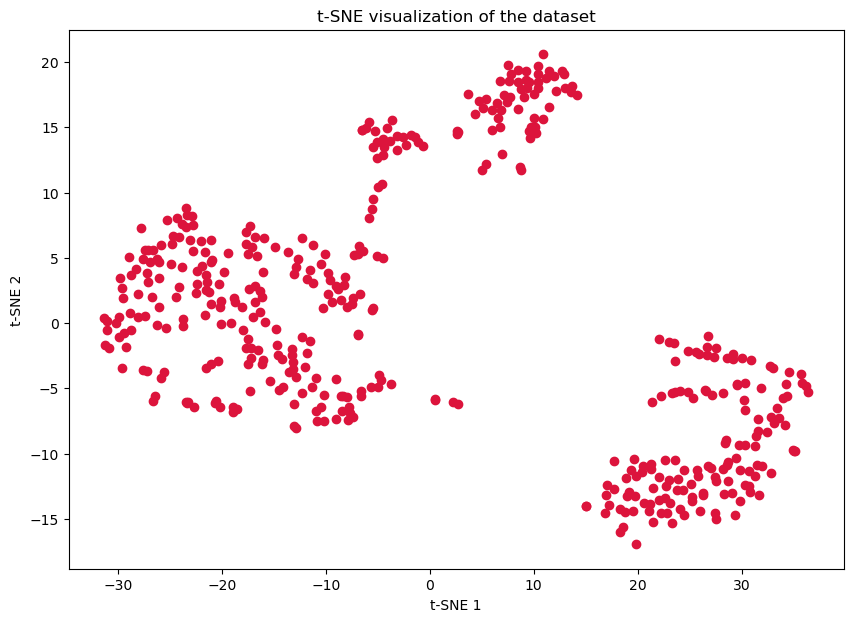

In [7]:
#Normalize original dataset using t-SNE and visualize
tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(scaled_data)
plt.figure(figsize=(10, 7))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], color='crimson')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE visualization of the dataset')
plt.show()

## 7

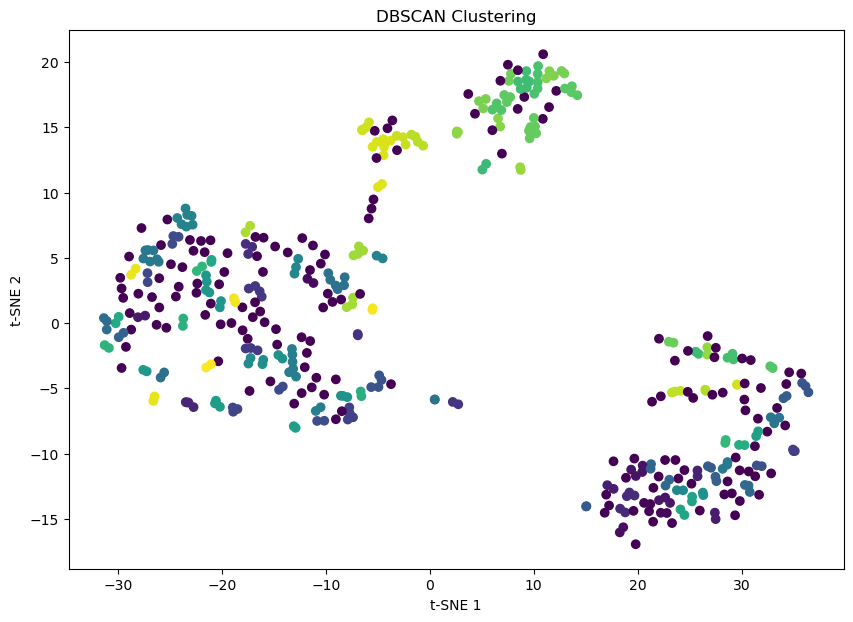

In [8]:
dbscan = DBSCAN(eps=0.7, min_samples=2)
dbscan_clusters = dbscan.fit_predict(tsne_data)
plt.figure(figsize=(10, 7))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=dbscan_clusters, cmap='viridis')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('DBSCAN Clustering')
plt.show()


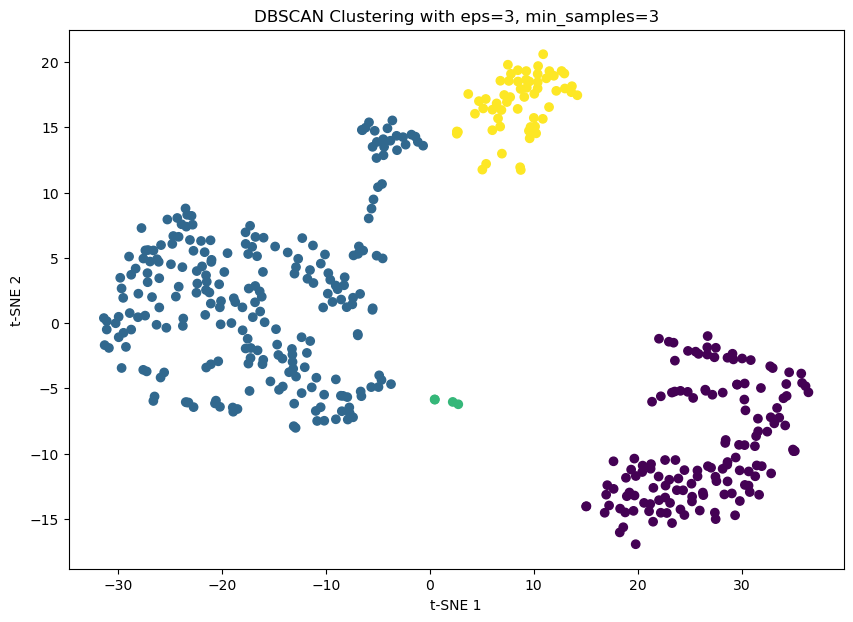

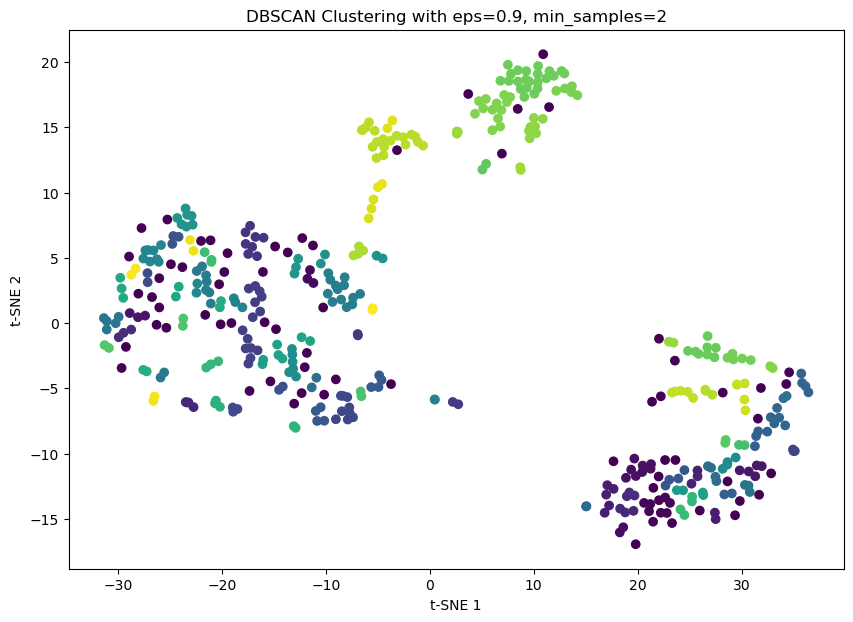

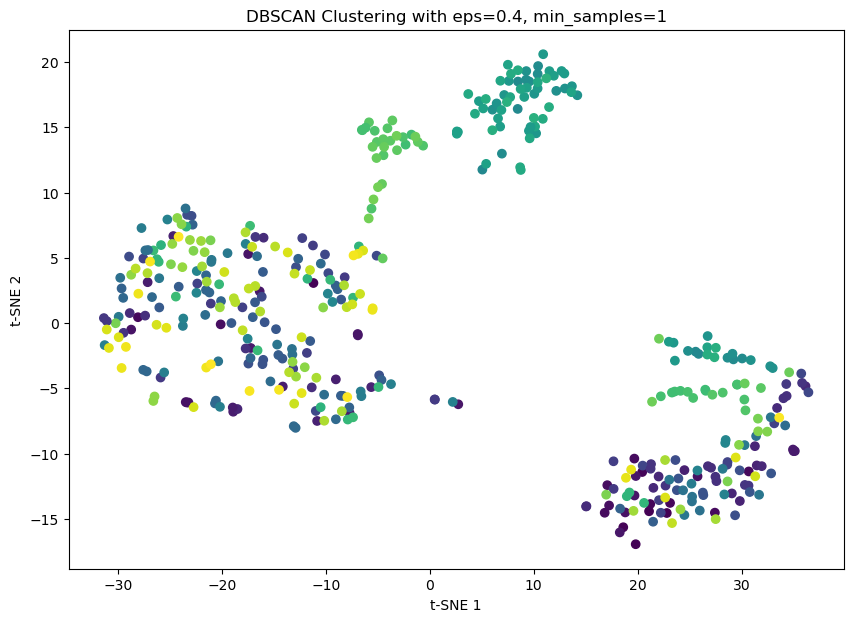

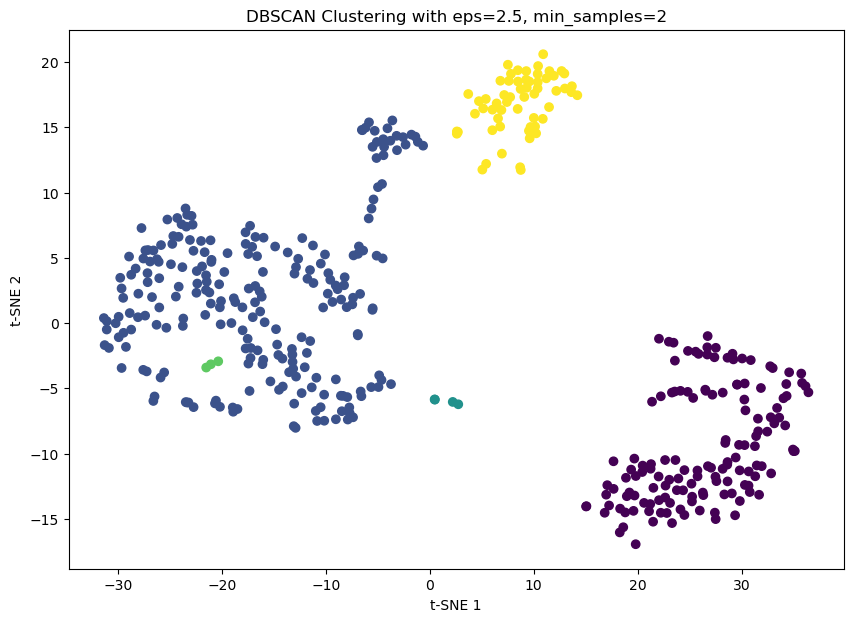

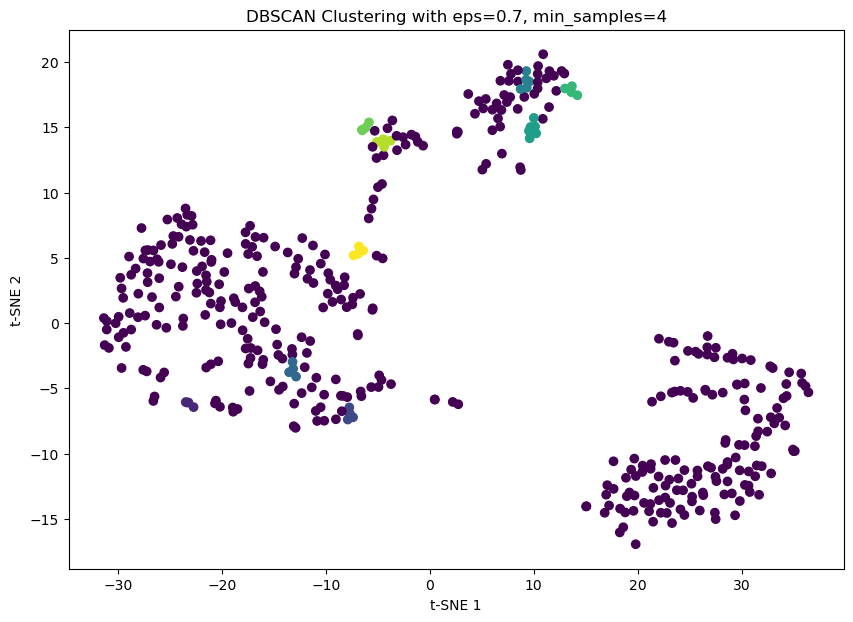

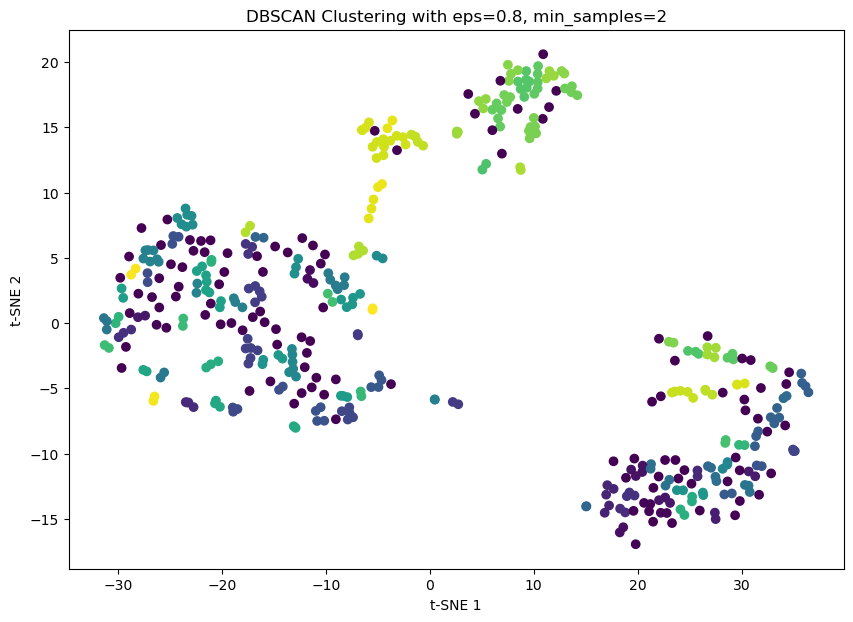

In [9]:
# Try different DBSCAN parameters
params = [
    (3, 3),(0.9, 2), (0.4, 1), (2.5, 2),
    (0.7, 4), (0.8, 2),
]
for eps, min_samples in params:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(tsne_data)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=clusters)
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.title(f'DBSCAN Clustering with eps={eps}, min_samples={min_samples}')
    plt.show()

    

## 8

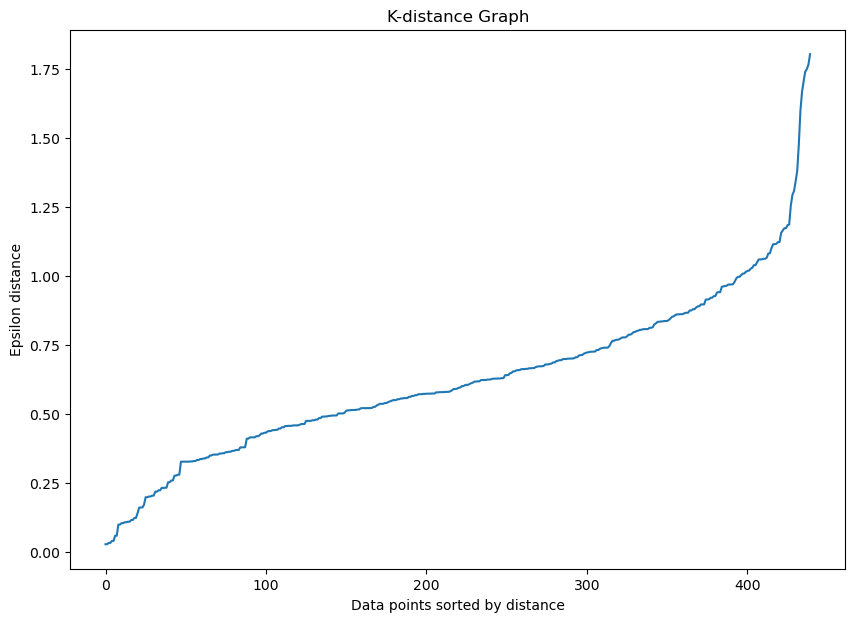

In [10]:
#Use Nearest Neighbors to find better DBSCAN parameters
nearest_neighbors = NearestNeighbors(n_neighbors=3)
neighbors = nearest_neighbors.fit(tsne_data)
distances, indices = neighbors.kneighbors(tsne_data)
distances = np.sort(distances[:, 1], axis=0)

plt.figure(figsize=(10, 7))
plt.plot(distances)
plt.xlabel('Data points sorted by distance')
plt.ylabel('Epsilon distance')
plt.title('K-distance Graph')
plt.show()

1.1847579284727978


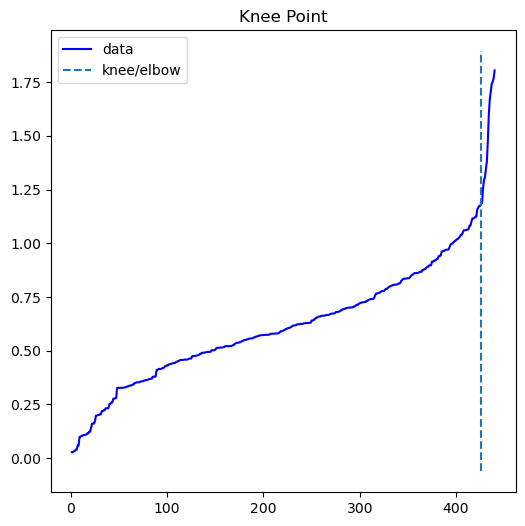

In [11]:
kneedle = KneeLocator(x = range(1, len(distances)+1), y = distances, S = 1.0, 
                      curve = "concave", direction = "increasing", online=True)
print(kneedle.knee_y)
kneedle.plot_knee()
plt.show()

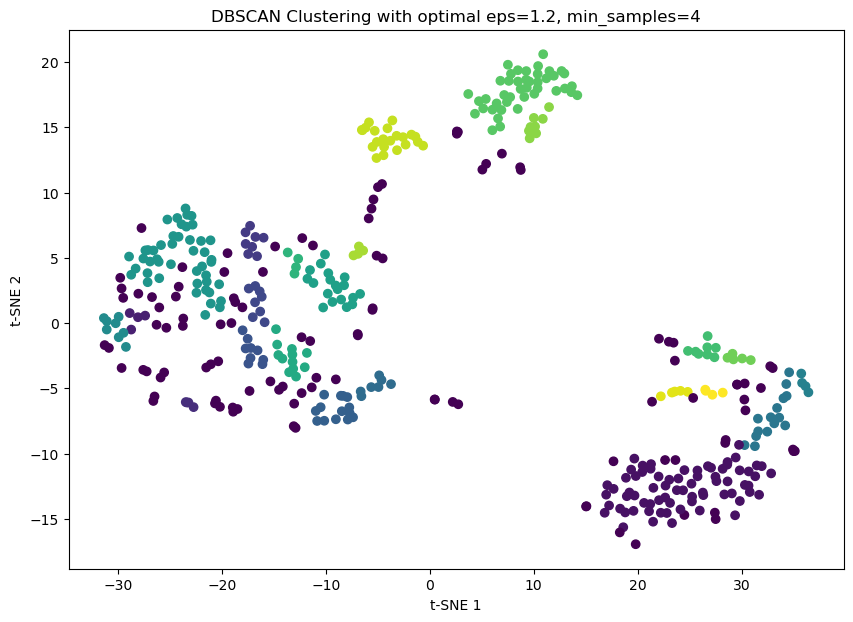

In [12]:
optimal_eps = 1.2
optimal_min_samples = 4

dbscan_optimal = DBSCAN(eps=optimal_eps, min_samples=optimal_min_samples)
optimal_clusters = dbscan_optimal.fit_predict(tsne_data)
plt.figure(figsize=(10, 7))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=optimal_clusters, cmap='viridis')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title(f'DBSCAN Clustering with optimal eps={optimal_eps}, min_samples={optimal_min_samples}')
plt.show()

# 5

In [13]:
#Load and report the dataset
df = pd.read_csv('EastWestAirlines.csv')
print("Dataset Report:")
print(df.info())
print("\nColumn Names:", df.columns.tolist())
df.head()

Dataset Report:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award              3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB
None

Column Names: ['ID', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles', 'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12', 'Days_since_enroll', 'Award']


,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [14]:
df.drop(columns=['ID'], inplace=True)
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


## 1

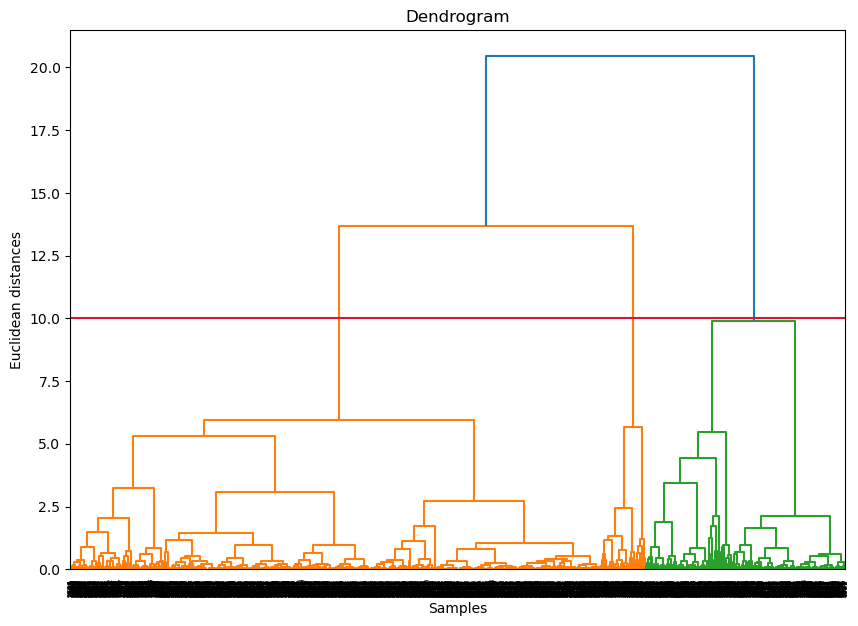

In [15]:
#Normalize the dataset and perform hierarchical clustering
df_normalized = normalize(df)
linked = linkage(df_normalized, method='ward', metric='euclidean')

plt.figure(figsize=(10, 7))
dend(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')

plt.axhline(10, color='crimson')
plt.show()

In [16]:
# Perform hierarchical clustering with the chosen number of clusters
hierarchical_clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
labels_hierarchical = hierarchical_clustering.fit_predict(df_normalized)
print(f"Hierarchical clustering labels: {np.unique(labels_hierarchical)}")

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Hierarchical clustering labels: [0 1 2]


## 2 

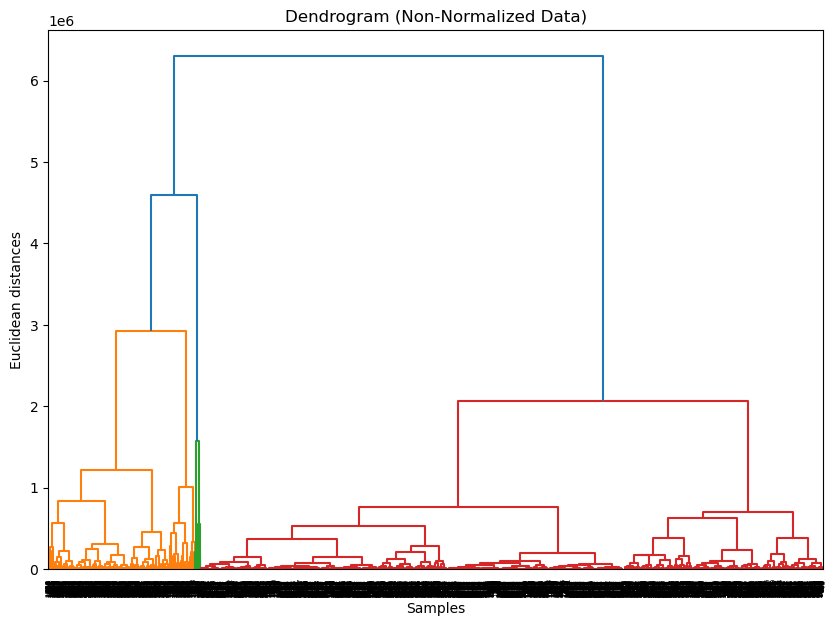

In [17]:
#Perform hierarchical clustering without normalizing
linked_non_normalized = linkage(df, method='ward', metric='euclidean')

plt.figure(figsize=(10, 7))
dend(linked_non_normalized, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram (Non-Normalized Data)')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()

بدون نرمالایز کردن، فیچرهای با اسکیل بالاتر معیارهای فاصله را تحت تاثیر قرار میدهند و الگوریتم خوشه بندی آن ویژگی ها را مهم تر میبیند به سمت آنها بایاس می شود.

## 3

In [18]:
df['Cluster_Hierarchical'] = labels_hierarchical
centroids_hierarchical = df.groupby('Cluster_Hierarchical').mean()
print("Centroids of the clusters:\n", centroids_hierarchical)

Centroids of the clusters:
                            Balance  Qual_miles  cc1_miles  cc2_miles  \
Cluster_Hierarchical                                                   
0                     52668.701550  103.471899   3.271318   1.030039   
1                     87185.011687  170.754565   1.691381   1.009861   
2                      5524.222707    8.755459   1.000000   1.000000   

                      cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
Cluster_Hierarchical                                                            
0                      1.043605  37729.176357    17.566860         503.352713   
1                      1.001461  10771.319211    10.123083         476.612126   
2                      1.000000    584.532751     2.401747          66.982533   

                      Flight_trans_12  Days_since_enroll     Award  
Cluster_Hierarchical                                                
0                            1.510659        4141.220930  0.671512 

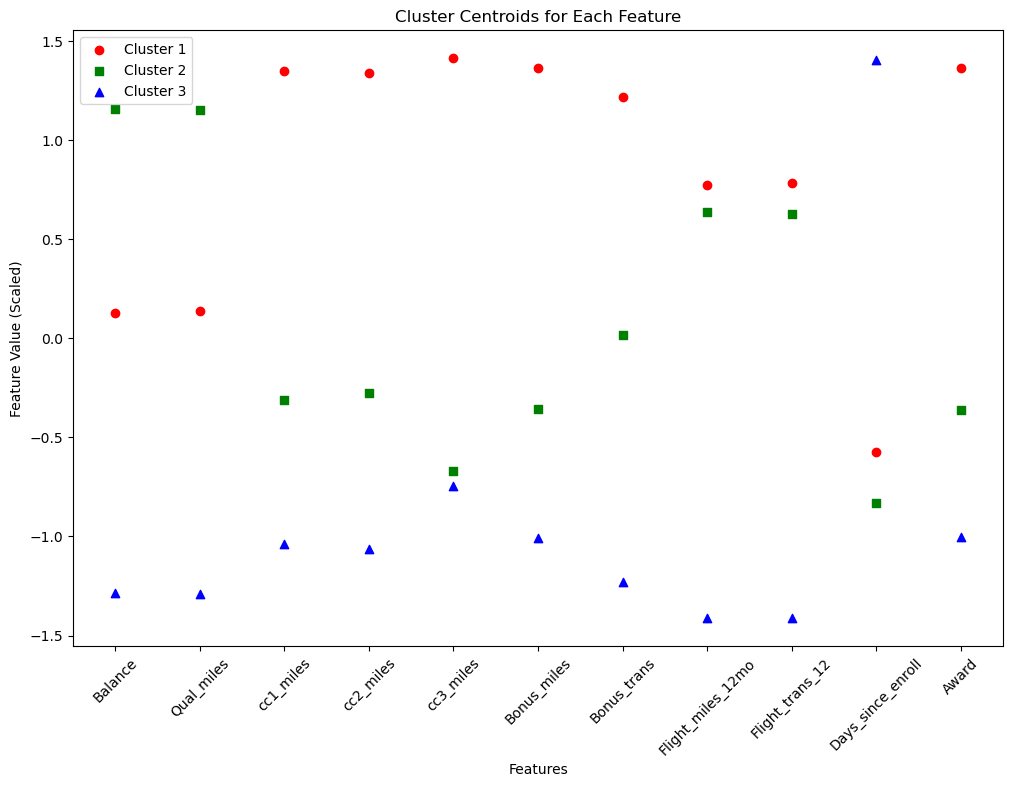

In [19]:
# Scale the centroids
scaler = StandardScaler()
centroids_scaled = scaler.fit_transform(centroids_hierarchical)

colors = ['red', 'green', 'blue']
markers = ['o', 's', '^'] 

plt.figure(figsize=(12, 8))
for i, feature in enumerate(centroids_hierarchical.columns):
    for j, centroid in enumerate(centroids_scaled):
        plt.scatter(i, centroid[i], color=colors[j], marker=markers[j])

legend_labels = [f'Cluster {j+1}' for j in range(len(centroids_scaled))]
plt.legend(legend_labels)

plt.xticks(range(len(centroids_hierarchical.columns)), centroids_hierarchical.columns, rotation=45)
plt.xlabel('Features')
plt.ylabel('Feature Value (Scaled)')
plt.title('Cluster Centroids for Each Feature')

plt.show()

دیده میشود سه خوشه بر اساس مقدار مایل های کم، متوسط و زیاد تقسیم شده اند(تقریبا مقادیر تمام ویژگی ها برای مرکز یک خوشه کم، برای یکی متوسط و برای دیگری زیاد است )

## 4

In [20]:
#Test stability by deleting 5% of the data
df_95, _ = train_test_split(df, test_size=0.05, random_state=42)
df_95_normalized = normalize(df_95.drop('Cluster_Hierarchical', axis=1))

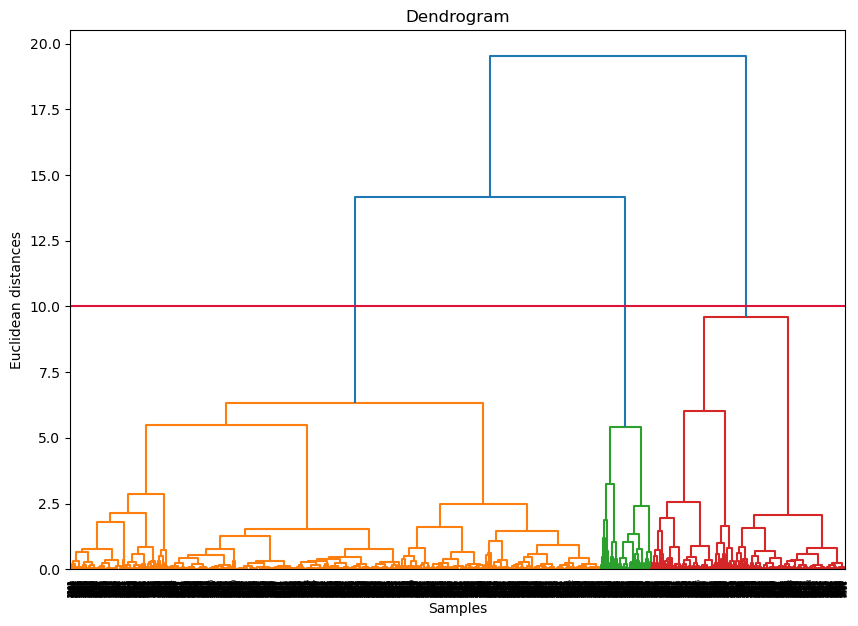

In [21]:
linked = linkage(df_95_normalized, method='ward', metric='euclidean')

plt.figure(figsize=(10, 7))
dend(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')

plt.axhline(10, color='crimson')
plt.show()

In [22]:
# Perform hierarchical clustering with the chosen number of clusters
hierarchical_clustering_95 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
labels_hierarchical_95 = hierarchical_clustering_95.fit_predict(df_95_normalized)
print(f"Hierarchical clustering labels (95% data): {np.unique(labels_hierarchical_95)}")

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Hierarchical clustering labels (95% data): [0 1 2]


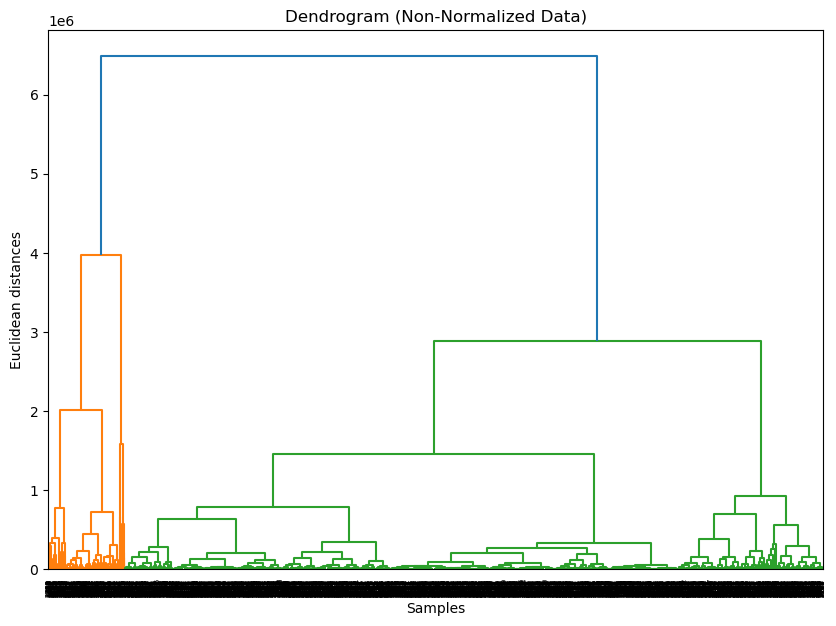

Centroids of the clusters:
                            Balance  Qual_miles  cc1_miles  cc2_miles  \
Cluster_Hierarchical                                                   
0                     52668.701550  103.471899   3.271318   1.030039   
1                     87185.011687  170.754565   1.691381   1.009861   
2                      5524.222707    8.755459   1.000000   1.000000   

                      cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
Cluster_Hierarchical                                                            
0                      1.043605  37729.176357    17.566860         503.352713   
1                      1.001461  10771.319211    10.123083         476.612126   
2                      1.000000    584.532751     2.401747          66.982533   

                      Flight_trans_12  Days_since_enroll     Award  
Cluster_Hierarchical                                                
0                            1.510659        4141.220930  0.671512 

In [23]:
#Perform hierarchical clustering without normalizing
linked_non_normalized_95 = linkage(df_95, method='ward', metric='euclidean')

plt.figure(figsize=(10, 7))
dend(linked_non_normalized_95, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram (Non-Normalized Data)')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()

df_95['Cluster_Hierarchical'] = labels_hierarchical_95
centroids_hierarchical = df.groupby('Cluster_Hierarchical').mean()
print("Centroids of the clusters:\n", centroids_hierarchical)

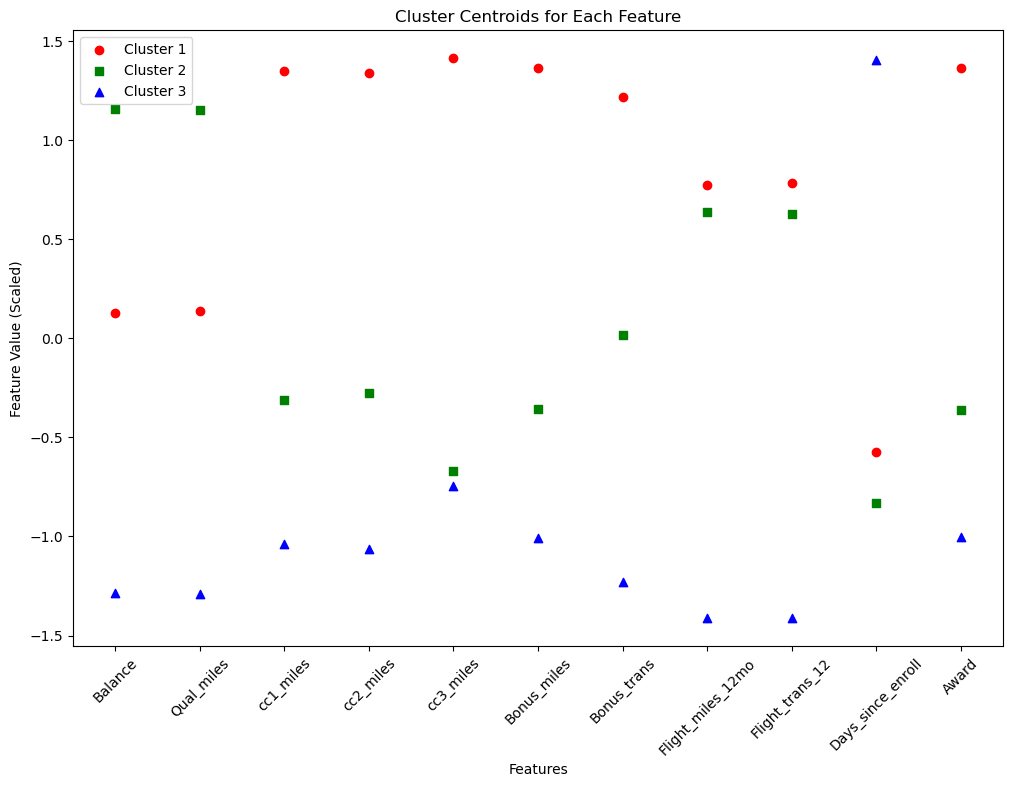

In [24]:
# Scale the centroids
scaler = StandardScaler()
centroids_scaled = scaler.fit_transform(centroids_hierarchical)

colors = ['red', 'green', 'blue']
markers = ['o', 's', '^'] 

plt.figure(figsize=(12, 8))
for i, feature in enumerate(centroids_hierarchical.columns):
    for j, centroid in enumerate(centroids_scaled):
        plt.scatter(i, centroid[i], color=colors[j], marker=markers[j])

legend_labels = [f'Cluster {j+1}' for j in range(len(centroids_scaled))]
plt.legend(legend_labels)

plt.xticks(range(len(centroids_hierarchical.columns)), centroids_hierarchical.columns, rotation=45)
plt.xlabel('Features')
plt.ylabel('Feature Value (Scaled)')
plt.title('Cluster Centroids for Each Feature')

plt.show()

بله نتایج مانند قبل شد.

## 5

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans clustering labels: [0 1 2]
Centroids of the KMeans clusters:
                      Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
Cluster_KMeans                                                              
0               86696.132743  164.510551   1.798162   1.011232   1.001702   
1               47062.690798  111.628221   3.319018   1.030675   1.053988   
2                5131.617886    8.150407   1.008130   1.000000   1.000000   

                 Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
Cluster_KMeans                                                                  
0               12337.173928    10.582029         469.027570         1.394826   
1               39388.652761    17.895706         546.411043         1.652761   
2                 869.394309     2.930894          66.808943         0.195122   

                Days_since_enroll     Award  Cluster_Hierarchical  
Cluster_KMeans                                                     
0  

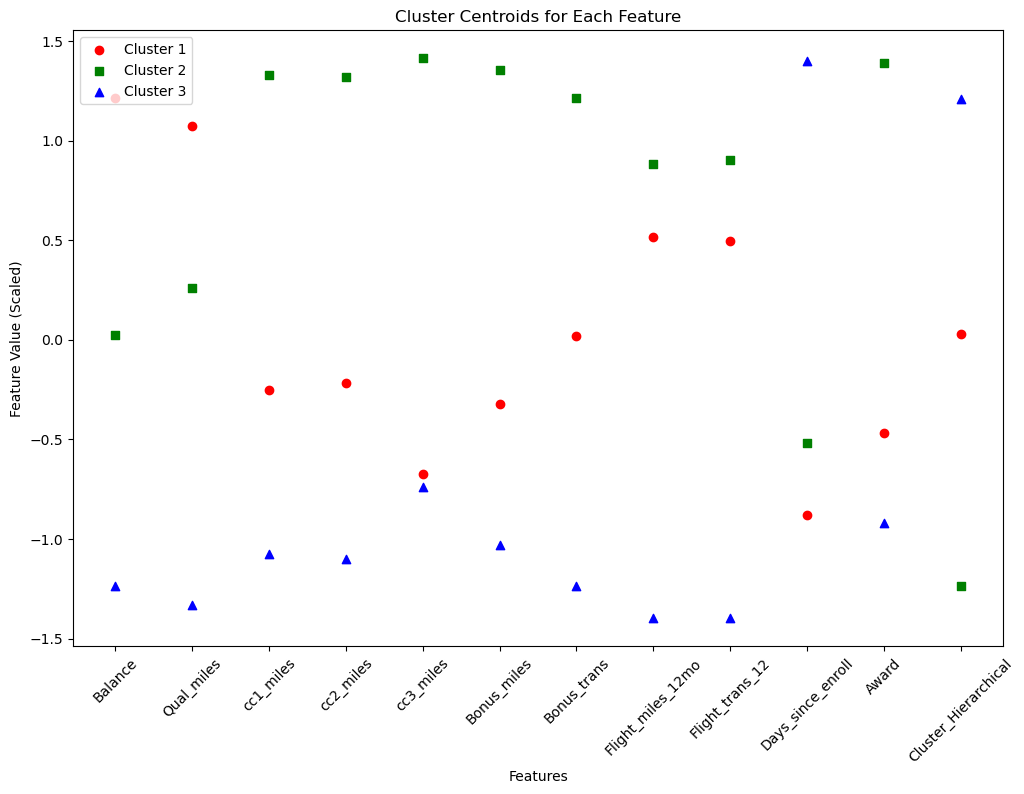

In [25]:
#k-means for clustering with the same number of clusters as in hierarchical clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster_KMeans'] = kmeans.fit_predict(df_normalized)

print("KMeans clustering labels:", np.unique(df['Cluster_KMeans']))

centroids_kmeans = df.groupby('Cluster_KMeans').mean()
print("Centroids of the KMeans clusters:\n", centroids_kmeans)


# Scale the centroids
scaler = StandardScaler()
centroids_scaled_k = scaler.fit_transform(centroids_kmeans)

colors = ['red', 'green', 'blue']
markers = ['o', 's', '^'] 

plt.figure(figsize=(12, 8))
for i, feature in enumerate(centroids_kmeans.columns):
    for j, centroid in enumerate(centroids_scaled_k):
        plt.scatter(i, centroid[i], color=colors[j], marker=markers[j])

legend_labels = [f'Cluster {j+1}' for j in range(len(centroids_scaled_k))]
plt.legend(legend_labels)

plt.xticks(range(len(centroids_kmeans.columns)), centroids_kmeans.columns, rotation=45)
plt.xlabel('Features')
plt.ylabel('Feature Value (Scaled)')
plt.title('Cluster Centroids for Each Feature')

plt.show()

در کل مانند قبل شد اما هماهنگی کم و زیاد بودن ویژگی ها با سلسله مراتبی بهتر دیده می شود

## 6 

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_k

The elbow point is at k=6


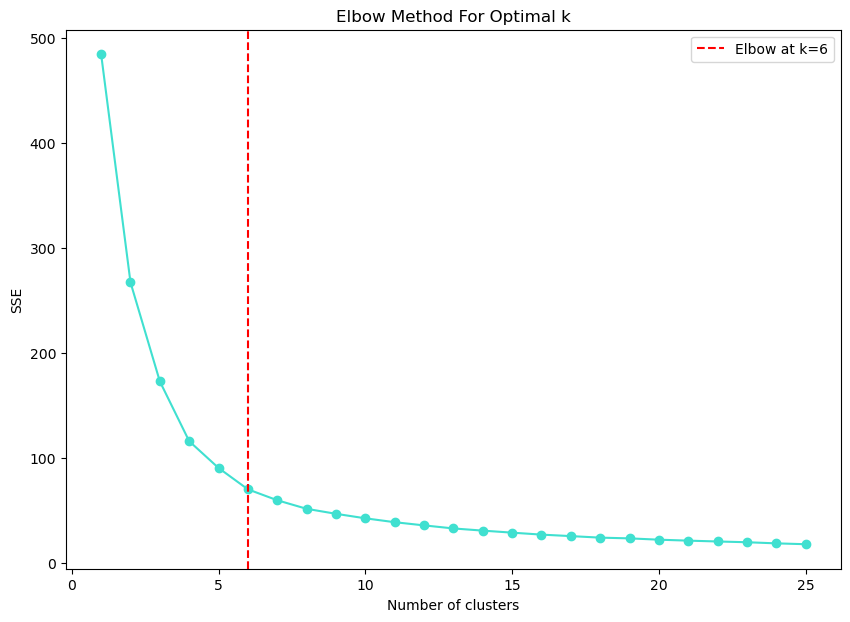

In [26]:
#Run k-means for k=1 to 25 and graph the SSE
sse = []
for k in range(1, 26):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_normalized)
    sse.append(kmeans.inertia_)

kneedle = KneeLocator(range(1, 26), sse, S=1.0, curve="convex", direction="decreasing")
elbow_point = kneedle.elbow
print(f"The elbow point is at k={elbow_point}")

plt.figure(figsize=(10, 7))
plt.plot(range(1, 26), sse, marker='o', color="turquoise")
plt.axvline(elbow_point, linestyle='--', color='r', label=f'Elbow at k={elbow_point}')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.legend()
plt.show()

## 7

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_k

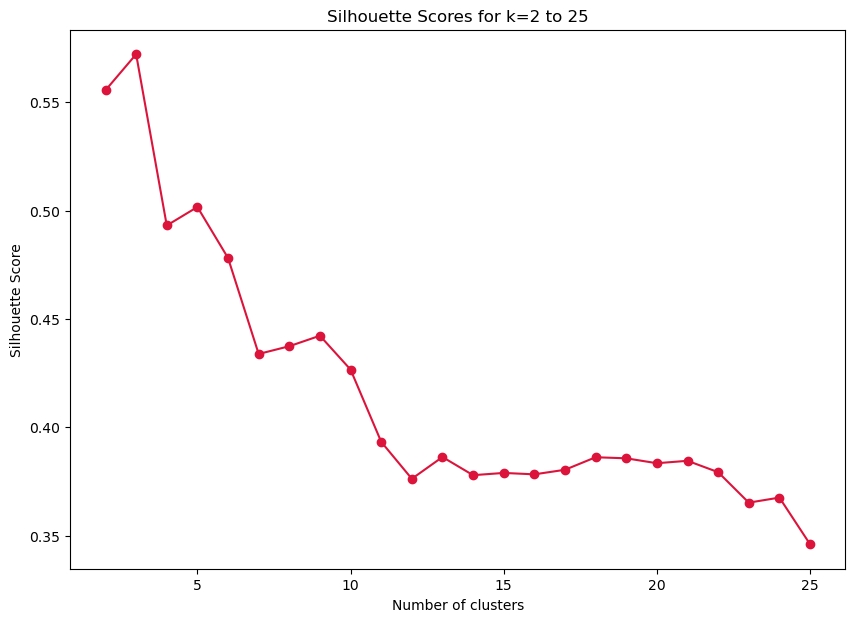

Best k according to silhouette score: 3


In [27]:
#Calculate the silhouette score for k=2 to 25
silhouette_scores = []
for k in range(2, 26):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_normalized)
    silhouette_scores.append(silhouette_score(df_normalized, labels))

plt.figure(figsize=(10, 7))
plt.plot(range(2, 26), silhouette_scores, marker='o', color='crimson')
plt.title('Silhouette Scores for k=2 to 25')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

best_k_silhouette = np.argmax(silhouette_scores) + 2
print(f"Best k according to silhouette score: {best_k_silhouette}")


## 8

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


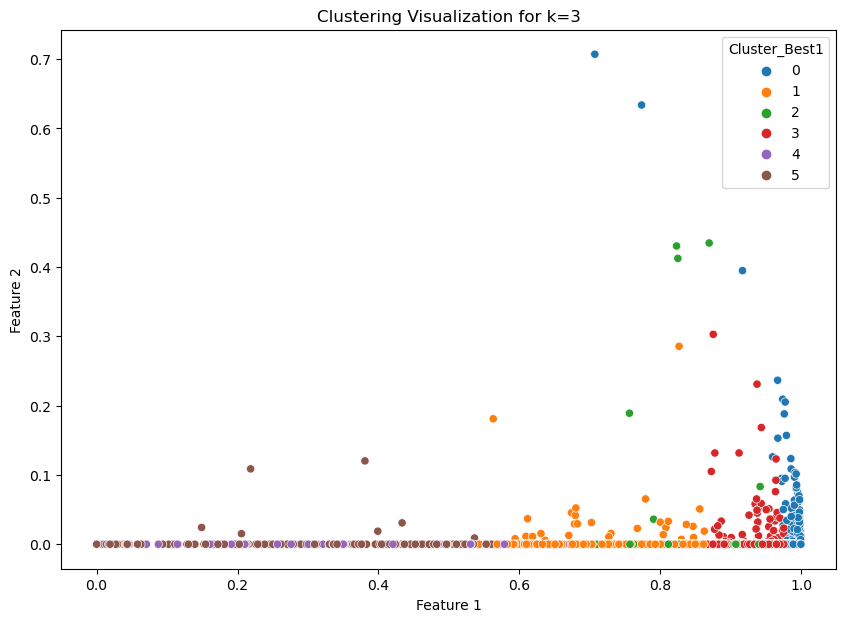

In [28]:
#Visualization for the best k found in part 6 and 7
kmeans_best = KMeans(n_clusters=6, random_state=42)
df['Cluster_Best1'] = kmeans_best.fit_predict(df_normalized)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=df_normalized[:, 0], y=df_normalized[:, 1], hue=df['Cluster_Best1'], palette='tab10')
plt.title(f'Clustering Visualization for k={best_k_silhouette}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


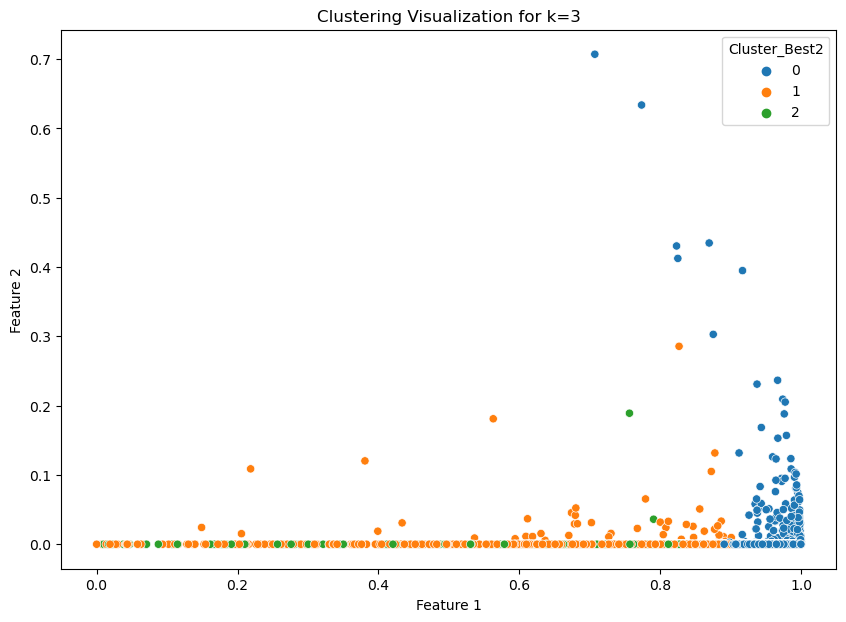

In [29]:
kmeans_best = KMeans(n_clusters=best_k_silhouette, random_state=42)
df['Cluster_Best2'] = kmeans_best.fit_predict(df_normalized)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=df_normalized[:, 0], y=df_normalized[:, 1], hue=df['Cluster_Best2'], palette='tab10')
plt.title(f'Clustering Visualization for k={best_k_silhouette}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()